V přiloženém excelu máte dvě tabulky. Jedna představuje transakce (objednávky), které proběhly v E-shopu. Druhá představuje databázi produktů v E-shopu.
Ke všem otázkám níže prosím popisujte i postup, jak jste k danému závěru došli. Pro analýzu a prezentaci výsledků využijte nástroje dle vaší volby.
Manager E-shopu se ptá:
1.	Na jaké kategorii produktů máme největší obrat? Mění se na tom v jednotlivých měsících něco?
2.	Který den v týdnu je nejsilnější na počet objednávek?
3.	Od 18. 3. 2022 došlo k navýšení budgetu na online marketingových platformách (Google Ads, Sklik, Facebook). Ovlivnilo to nějak prodeje? A pokud ano, tak jak? (externí vlivy zanedbejme)

Pokud něco ze zadání není jasné, tak se neváhejte zeptat.


import packages:

In [1]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # maybe not needed
import pandas as pd # for dataframes
from datetime import datetime # for format conversion
from datetime import date # for days of the week

specify input .csv files:

In [2]:
input_products = "./produkty.csv"
input_transactions = "./transakce.csv"

read product .csv file into a dataframe:

In [3]:
products_DF = pd.read_csv(input_products,sep = ";")
#products_DF

read transaction .csv file into a dataframe:

In [4]:
transactions_DF = pd.read_csv(input_transactions, sep = ";")
#transactions_DF

create a copy beacause we will alter the dataframe next and keeping it the same way might be helpful:

In [5]:
money_transactions_DF = transactions_DF.copy()

merging the two dataframes, thus adding Category and Price to transactions:

In [6]:
money_transactions_DF = money_transactions_DF.merge(products_DF, how="inner", on="Product name")

out of Quantity and Price we can then calculate total paid amount:

In [7]:
money_transactions_DF["Paid amount"] = money_transactions_DF["Price"]*money_transactions_DF["Quantity"]

sorting the values by date:

In [8]:
money_transactions_DF["Date"] = pd.to_datetime(money_transactions_DF["Date"], format="%d.%m.%Y")
money_transactions_DF.sort_values(by="Date")


,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980
...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980


summing the paid amounts by category:

In [9]:
total_made_by_category_DF = money_transactions_DF.groupby("Category")["Paid amount"].sum()
total_made_by_category_DF

Category
Audio                416370
Mobilní telefony     614460
Tablety              623660
Televize            1205680
Name: Paid amount, dtype: int64

Plotting the results:

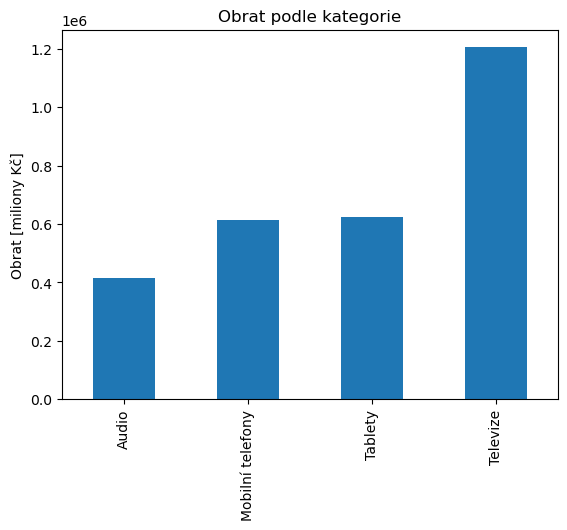

In [10]:
total_made_by_category_DF.plot.bar()

plt.xlabel(None)
plt.ylabel("Obrat [miliony Kč]")
plt.title("Obrat podle kategorie")

plt.show()

add day of week column to our dataframe:

In [11]:
money_transactions_DF["Day of week"] = money_transactions_DF["Date"].dt.day_name()
money_transactions_DF.sort_values(by="Date")

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,Tuesday
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,Wednesday
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,Wednesday
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,Thursday
...,...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990,Friday
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990,Friday
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990,Sunday
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980,Sunday


add the name of the month we will use this later to analyse by month - this approach is safe since our data do not span across a whole year:

In [12]:
money_transactions_DF["Month"] = money_transactions_DF["Date"].dt.month_name()
money_transactions_DF

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week,Month
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday,February
1,8,2022-02-08,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday,February
2,19,2022-02-19,Samsung QN55Q80T,1,Televize,29990,29990,Saturday,February
3,37,2022-03-09,Samsung QN55Q80T,1,Televize,29990,29990,Wednesday,March
4,45,2022-03-17,Samsung QN55Q80T,1,Televize,29990,29990,Thursday,March
...,...,...,...,...,...,...,...,...,...
136,46,2022-03-18,LG 75NANO81,1,Televize,44990,44990,Friday,March
137,62,2022-04-18,LG 75NANO81,1,Televize,44990,44990,Monday,April
138,68,2022-04-29,LG 75NANO81,1,Televize,44990,44990,Friday,April
139,72,2022-05-14,LG 75NANO81,1,Televize,44990,44990,Saturday,May


get the information about monthly amount of money by category:

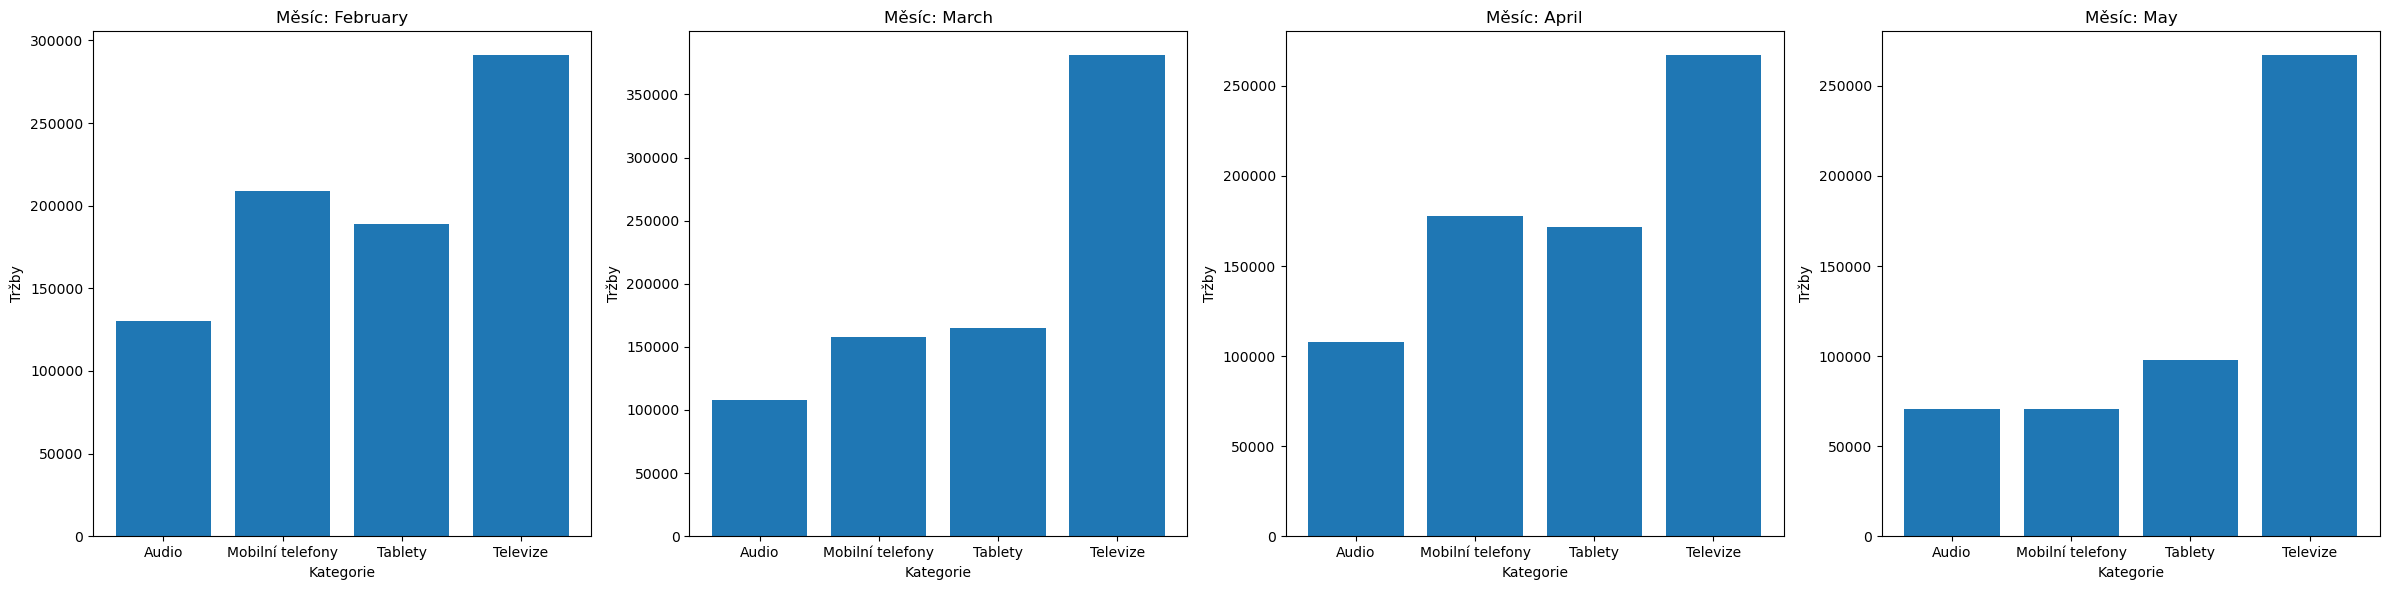

In [13]:
# Get the unique months in the original order
month_order = money_transactions_DF['Month'].unique()

# Convert 'month' column to Categorical data type with the specified order
money_transactions_DF['Month'] = pd.Categorical(money_transactions_DF['Month'], categories=month_order, ordered=True)

# Create a pivot table to calculate the total amount for each category and month combination
pivot_df = money_transactions_DF.pivot_table(values='Paid amount', index='Category', columns='Month', aggfunc='sum')

# Create subplots
fig, axes = plt.subplots(ncols=len(pivot_df.columns), figsize=(6 * len(pivot_df.columns), 6))

# Iterate over each month
for i, month in enumerate(pivot_df.columns):
    # Plot a bar plot for each category
    axes[i].bar(pivot_df.index, pivot_df[month])
    axes[i].set_xlabel('Kategorie')
    axes[i].set_ylabel('Tržby')
    axes[i].set_title(f'Měsíc: {month}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
transactions_grouped_by_tID_DFgb = money_transactions_DF.groupby("Transaction ID")

In [15]:
transactions_grouped_by_tID_DFgb

In [16]:
list_of_transactions_by_days = []


for ID, group in transactions_grouped_by_tID_DFgb:
    print(f"ID: {ID}")
    print(group["Day of week"].unique())
    list_of_transactions_by_days.append(str(group["Day of week"].unique()[0]))
    print("*****")
    
print(list_of_transactions_by_days)

day_names = [         
        'Monday',         
        'Tuesday',         
        'Wednesday',         
        'Thursday',         
        'Friday',         
        'Saturday',
        'Sunday',    
        ]

counts_for_days_of_week = []
for day in day_names:
    print(f"{day}:",list_of_transactions_by_days.count(f"{day}"))

    
#...
#...
#...

ID: 1
['Tuesday']
*****
ID: 2
['Wednesday']
*****
ID: 3
['Thursday']
*****
ID: 4
['Friday']
*****
ID: 5
['Saturday']
*****
ID: 6
['Sunday']
*****
ID: 7
['Monday']
*****
ID: 8
['Tuesday']
*****
ID: 9
['Wednesday']
*****
ID: 10
['Thursday']
*****
ID: 11
['Friday']
*****
ID: 12
['Saturday']
*****
ID: 13
['Sunday']
*****
ID: 14
['Monday']
*****
ID: 15
['Tuesday']
*****
ID: 16
['Wednesday']
*****
ID: 17
['Thursday']
*****
ID: 18
['Friday']
*****
ID: 19
['Saturday']
*****
ID: 20
['Sunday']
*****
ID: 21
['Monday']
*****
ID: 22
['Tuesday']
*****
ID: 23
['Wednesday']
*****
ID: 24
['Thursday']
*****
ID: 25
['Friday']
*****
ID: 26
['Saturday']
*****
ID: 27
['Sunday']
*****
ID: 28
['Monday']
*****
ID: 29
['Tuesday']
*****
ID: 30
['Wednesday']
*****
ID: 31
['Thursday']
*****
ID: 32
['Friday']
*****
ID: 33
['Saturday']
*****
ID: 34
['Sunday']
*****
ID: 35
['Monday']
*****
ID: 36
['Tuesday']
*****
ID: 37
['Wednesday']
*****
ID: 38
['Thursday']
*****
ID: 39
['Friday']
*****
ID: 40
['Saturday']
*****
I

In [17]:
money_transactions_DF.groupby("Day of week").count()

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Month
Day of week,,,,,,,,
Friday,20,20,20,20,20,20,20,20
Monday,25,25,25,25,25,25,25,25
Saturday,29,29,29,29,29,29,29,29
Sunday,14,14,14,14,14,14,14,14
Thursday,15,15,15,15,15,15,15,15
Tuesday,16,16,16,16,16,16,16,16
Wednesday,22,22,22,22,22,22,22,22


In [18]:
20+25+29+14+15+16+22

141

In [19]:
series = money_transactions_DF.groupby("Day of week")["Quantity"].sum()
series

Day of week
Friday       22
Monday       29
Saturday     31
Sunday       18
Thursday     19
Tuesday      18
Wednesday    26
Name: Quantity, dtype: int64

In [20]:
sorted_series = series.loc[day_names]


<Axes: xlabel='Day of week'>

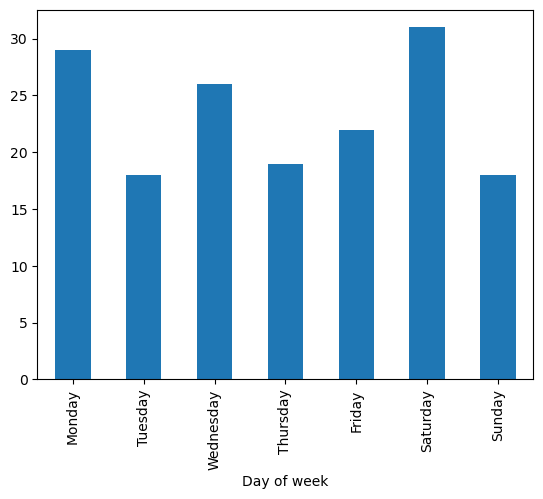

In [21]:
sorted_series.plot.bar()